In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import spearmanr
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import preprocessing

from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

In [3]:
df_18 = pd.read_csv('C:\\Users\\Zulu\\Desktop\\Thesis 1\\CSVs\\Saved Outputs\\True-18-19.csv')
df_19 = pd.read_csv('C:\\Users\\Zulu\\Desktop\\Thesis 1\\CSVs\\Saved Outputs\\Merged-Filtered-19-20.csv')
df_20 = pd.read_csv('C:\\Users\\Zulu\\Desktop\\Thesis 1\\CSVs\\Saved Outputs\\True-20-21.csv')
df = pd.concat([df_18, df_20, df_19], axis=0)
df = df.drop(columns=['Name', 'Age', 'Barangay', 'School', 'Strand','PassCheck'])
df['Contemporary Arts'] = df['Contemporary Philippine Arts from the Regions'].fillna(df['Contemporary Arts from the Regions & the World'])
df = df.drop(columns=['Contemporary Philippine Arts from the Regions','Contemporary Arts from the Regions & the World'])
df['Disciplines in Social Sciences'] = df['Discipline and Ideas in Applied Sciences'].fillna(df['Discipline and Ideas in Social Sciences'])
df['Disciplines in Social Sciences'] = df['Disciplines in Social Sciences'].fillna(df['Discipline and Ideas in Social Science'])
df['Disciplines in Social Sciences'] = df['Disciplines in Social Sciences'].fillna(df['Discipline and Ideas in the Social Sciences'])
df['Disciplines in Social Sciences'] = df['Disciplines in Social Sciences'].fillna(df['Discipline and Ideas in the Applied Social Science'])
df = df.drop(columns=['Discipline and Ideas in Applied Sciences','Discipline and Ideas in Social Sciences','Discipline and Ideas in Social Science','Discipline and Ideas in the Social Sciences','Discipline and Ideas in the Applied Social Science'])
df

,21st Century Literature from the Philippines and the World,Advanced Statistics,Applied Economics,Basic Calculus,Biochemistry,Business Enterprise Simulation,Business Ethics & Social Responsibility,Business Finance,Business Mathematics,Christian Discipleship and Morality,...,Aquaculture 3,Aquaculture 4,HUMSS 1,HUMSS 2,Wellness and Massage 1,Wellness and Massage 1.1,Contemporary Philippine Arts from the Regions & the World,General Mathematics,Contemporary Arts,Disciplines in Social Sciences
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN
1,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN
2,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN
3,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,NaN
4,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,92.0,NaN,NaN,NaN
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN
209,NaN,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN,NaN,NaN
210,88.0,NaN,NaN,92.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,93.0,NaN,NaN,NaN


In [4]:
multi_df = df[['Intro to Philosophy and the Human Person']] ##DOES NOTHING FOR MODEL, ONLY CHECKS NUMBER OF ROWS
multi_df = multi_df.dropna()
print(len(multi_df))

304


In [5]:
#Uses Z-Score for Critical Value Calculation
def get_prediction_interval(prediction, y_test, test_predictions, pi=.95): #70 Threshold?
    '''
    Get a prediction interval for a linear regression.
    
    INPUTS: 
        - Single prediction, 
        - y_test
        - All test set predictions,
        - Prediction interval threshold (default = .95)
    OUTPUT: 
        - Prediction interval for single prediction
    '''
    
    #get standard deviation of y_test
    sum_errs = np.sum((y_test - test_predictions)**2)
    stdev = np.sqrt(1 / (len(y_test) - 2) * sum_errs)
#get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev
#generate prediction interval lower and upper bound
    lower, upper = prediction - interval, prediction + interval
    return lower, prediction, upper

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h
    

def interval_score(statuscol,dataframe_len):
    status_passed = statuscol.loc[statuscol == 'PASSED']
    #print(len(status_passed))
    passed_percentage = (len(status_passed) / dataframe_len) * 100
    return passed_percentage

In [6]:
score = 'raw1'
subject = ['Intro to Philosophy and the Human Person']
# dataframe = np.array([score,subject[0]],dtype=object)
# #'21st Century Literature from the Philippines and the World'
# #'General Chemistry 2'
# #'Research in Daily Life 2'
# #'Inquiries, Investigation, & Immersion'
# #'Intro to Philosophy and the Human Person'
# linear_df = df[[dataframe[i] for i in range(len(dataframe))]]
linear_df = pd.DataFrame()
for i in subject:
    linear_df[i] = df[i]
#linear_df['schname'] = df['schname']
#linear_df = pd.get_dummies(linear_df, columns=["schname"])
linear_df[score] = df[score]
# # Check Outlier Data Using IQR
# Q1=linear_df[subject[0]].quantile(0.25)
# Q3=linear_df[subject[0]].quantile(0.75)
# IQR = Q3 - Q1
# Lower_Whisker = Q1 - 1.5 * IQR
# Upper_Whisker = Q3 + 1.5 * IQR
# # Drop Outlier Data
# linear_df = linear_df[linear_df[subject[0]] > Lower_Whisker]
# linear_df = linear_df[linear_df[subject[0]] < Upper_Whisker]

#linear_df[subject[0]],parameters = stats.boxcox(linear_df[subject[0]]) #Boxcox
#linear_df[score],parameters = stats.boxcox(linear_df[score]) #Boxcox
# scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)) ## Normalization
# d = scaler.fit_transform(linear_df[subject[0]].values.reshape(-1,1))
# tempFrame = pd.DataFrame(d, columns=[subject[0]])
# linear_df[subject[0]] = tempFrame[subject[0]]

# d = scaler.fit_transform(linear_df[score].values.reshape(-1,1))
# tempFrame = pd.DataFrame(d, columns=[score])
# linear_df[score] = tempFrame[score] ##

#linear_df[subject[0]] = np.sqrt(linear_df[subject[0]]) #Sqrt Transformation

linear_df = linear_df.dropna()

x = linear_df.drop(score, axis=1)
y = linear_df[[score]]
x

,Intro to Philosophy and the Human Person
1,86.0
5,91.0
8,92.0
9,85.0
13,90.0
...,...
204,87.0
207,91.0
208,92.0
209,99.0


In [7]:
# #Define input array with angles from 60deg to 300deg converted to radians
# x = np.array([i*np.pi/180 for i in range(60,300,4)])
# np.random.seed(10)  #Setting seed for reproducibility
# y = np.sin(x) + np.random.normal(0,0.15,len(x))

In [8]:
models = []
n_neighbors = 5
models.append(("Linear",LinearRegression())) #
#models.append(("Logistic",LogisticRegression())) #Max_iter problem
models.append(("DecisionTree",DecisionTreeRegressor(random_state=0))) # #Tune Parameters
models.append(("Ridge",Ridge(alpha=0.1))) #
models.append(("Lasso",Lasso(alpha=0.01))) #
models.append(("RandomForest",RandomForestRegressor(n_estimators = 50, random_state = 0))) # #Needs code to find n_estimators | Stage Predict?
models.append(("KneighborsUniform",KNeighborsRegressor(n_neighbors=n_neighbors,weights='uniform')))
models.append(("KneighborsDistance",KNeighborsRegressor(n_neighbors=n_neighbors,weights='distance')))
models.append(("SVR RBF",SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1))) #
models.append(("SVR Linear",SVR(kernel="linear", C=100, gamma="auto"))) #
#models.append(("SVR Poly",SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)))
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=0)
#x_train = x_train.reshape(-1, 1)
#y_train = y_train.reshape(-1, 1)
#x_test = x_test.reshape(-1, 1)
#y_test = y_test.reshape(-1, 1)
pi = .90
ax = []

for i in range(len(models)):
   ax.append('')

fig, ((ax[0],ax[1],ax[2]),(ax[3],ax[4],ax[5]),(ax[6],ax[7],ax[8])) = plt.subplots(3,3,figsize=(9,9),dpi=1200)
print('/////////////////')
j = 0
for name,model in models:
   # kfold = KFold(n_splits=2, random_state=0,shuffle=True)
   # cv_result = cross_val_score(model, x_train, y_train, cv = kfold, scoring = "neg_mean_absolute_error")
   print(name)
   currentModel = model
   #currentModel.fit(x_train,y_trainr)
   currentModel.fit(x_train,y_train.values.ravel())
   currentPrediction = currentModel.predict(x_test)
   Model_score = currentModel.score(x_test,y_test)
   R2_score = r2_score(y_test,currentPrediction) #Same as Model_Score
   Mean_sqrd_err = mean_squared_error(y_test,currentPrediction)
   Root_mn_sqrd_err = np.sqrt(mean_squared_error(y_test,currentPrediction))
   print('Model Score: ', Model_score)
   print('R2 Score: ', R2_score)
   print('Mean Squared Error: ', Mean_sqrd_err)
   print('Root Mean Squared Error: ', Root_mn_sqrd_err)
   currentPrediction = currentPrediction.reshape(len(currentPrediction),1)
   # verification_df = pd.DataFrame(columns=["predicted","lowerlimit", "upperlimit","actual","status"])
   # confidence_level = get_prediction_interval(currentPrediction[0], y_test, currentPrediction, pi=pi)
   # lower_range = confidence_level[1][0] - confidence_level[0][0]
   # upper_range = confidence_level[2][0] - confidence_level[1][0]
   # for i in range(len(y_test)):
   #    pred = get_prediction_interval(currentPrediction[i], y_test, currentPrediction, pi=pi)
   #    status = 'FAILED'
   #    if y_test.iloc[i][0] >= pred[0][0] and y_test.iloc[i][0] <= pred[2][0]:
   #       status = 'PASSED'
   #    new_row = {'predicted':pred[1][0],'lowerlimit':pred[0][0],'upperlimit':pred[2][0],'actual':y_test.iloc[i][0],'status':status}
   #    verification_df = verification_df.append(new_row,ignore_index=True)
   # verification_df
   # print('Interval Accuracy Percentage: ',interval_score(verification_df['status'],len(verification_df)))
   # print('Upper Range: ',upper_range)
   # print('Lower Range: ',lower_range)
   print('/////////////////')
   ax[j].scatter(x_train, y_train, color = "red")
   ax[j].plot(x_train, currentModel.predict(x_train), color = "green")
   ax[j].set_title(name,fontdict={'fontsize':10,})
   #ax[j].xlabel("Grade")
   # plt.ylabel("Score")
   j = j + 1



/////////////////
Linear
Model Score:  0.17383525243710685
R2 Score:  0.17383525243710685
Mean Squared Error:  88.76107506628833
Root Mean Squared Error:  9.421309625858198
/////////////////
DecisionTree
Model Score:  0.2103132614348272
R2 Score:  0.2103132614348272
Mean Squared Error:  84.84196897459574
Root Mean Squared Error:  9.210970034398969
/////////////////
Ridge
Model Score:  0.17383323510717508
R2 Score:  0.17383323510717508
Mean Squared Error:  88.76129180317288
Root Mean Squared Error:  9.421321128332952
/////////////////
Lasso
Model Score:  0.1737696320951162
R2 Score:  0.1737696320951162
Mean Squared Error:  88.76812515178095
Root Mean Squared Error:  9.421683774770885
/////////////////
RandomForest
Model Score:  0.206546648935658
R2 Score:  0.206546648935658
Mean Squared Error:  85.24664440497524
Root Mean Squared Error:  9.232910938862956
/////////////////
KneighborsUniform
Model Score:  0.07558879747361436
R2 Score:  0.07558879747361436
Mean Squared Error:  99.31642857

<ipython-input-9-47fcdb7cb3a8>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


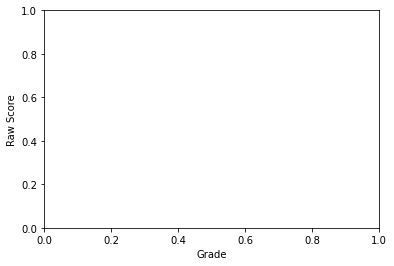

In [9]:
#PLOT MODEL RESULTS!!!
plt.xlabel('Grade')
plt.ylabel('Raw Score')
fig.show()

In [10]:
# ridge_df = df[[subject, score]]
# ridge_df = ridge_df.dropna()
# X = ridge_df[subject]
# y =  ridge_df[score]
# define model
ridgeModel = Ridge(alpha=.9,normalize=True) #Automate Alpha Set
ridgeModel.fit(x_train, y_train)
ridgePredictions = ridgeModel.predict(x_test)
Model_score = ridgeModel.score(x_test,y_test)
R2_score = r2_score(y_test,ridgePredictions) #Same as Model_Score
Mean_sqrd_err = mean_squared_error(y_test,ridgePredictions)
Root_mn_sqrd_err = np.sqrt(mean_squared_error(y_test,ridgePredictions))
print('Model Score: ', Model_score)
print('R2 Score: ', R2_score)
print('Mean Squared Error: ', Mean_sqrd_err)
print('Root Mean Squared Error: ', Root_mn_sqrd_err)

verification_df = pd.DataFrame(columns=["predicted","lowerlimit", "upperlimit","actual","status"])
for i in range(len(y_test)):
    pred = get_prediction_interval(ridgePredictions[i], y_test, ridgePredictions, pi=.90) #Find a way to automate this
    #pred[0][0] #Returns Lower Limit
    #pred[1][0] #Returns Y_Prediction
    #pred[2][0] #Returns Upper Limit
    #y_test.iloc[i][0] #Returns Y_Actual
    status = 'FAILED'
    if y_test.iloc[i][0] >= pred[0][0] and y_test.iloc[i][0] <= pred[2][0]:
        status = 'PASSED'
    new_row = {'predicted':pred[1][0],'lowerlimit':pred[0][0],'upperlimit':pred[2][0],'actual':y_test.iloc[i][0],'status':status}
    verification_df = verification_df.append(new_row,ignore_index=True)
#verification_df
print('Interval Accuracy Percentage: ',interval_score(verification_df['status'],len(verification_df)))
lower_range = pred[1][0] - pred[0][0]
upper_range = pred[2][0] - pred[1][0]
print('Upper Range: ',upper_range)
print('Lower Range: ',lower_range)

Model Score:  0.10381541584698084
R2 Score:  0.10381541584698084
Mean Squared Error:  96.28383125994
Root Mean Squared Error:  9.812432484350657
Interval Accuracy Percentage:  89.28571428571429
Upper Range:  16.43618693188411
Lower Range:  16.43618693188411


In [11]:
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
Model_score = model.score(x_test,y_test)
R2_score = r2_score(y_test,predictions) #Same as Model_Score
Mean_sqrd_err = mean_squared_error(y_test,predictions)
Root_mn_sqrd_err = np.sqrt(mean_squared_error(y_test,predictions))
print('Model Score: ', Model_score)
print('R2 Score: ', R2_score)
print('Mean Squared Error: ', Mean_sqrd_err)
print('Root Mean Squared Error: ', Root_mn_sqrd_err)
verification_df = pd.DataFrame(columns=["predicted","lowerlimit", "upperlimit","actual","status"])
for i in range(len(y_test)):
    pred = get_prediction_interval(predictions[i], y_test, predictions, pi=.90) #Find a way to automate this
    #pred[0][0] #Returns Lower Limit
    #pred[1][0] #Returns Y_Prediction
    #pred[2][0] #Returns Upper Limit
    #y_test.iloc[i][0] #Returns Y_Actual
    status = 'FAILED'
    if y_test.iloc[i][0] >= pred[0][0] and y_test.iloc[i][0] <= pred[2][0]:
        status = 'PASSED'
    new_row = {'predicted':pred[1][0],'lowerlimit':pred[0][0],'upperlimit':pred[2][0],'actual':y_test.iloc[i][0],'status':status}
    verification_df = verification_df.append(new_row,ignore_index=True)
#verification_df
print('Interval Accuracy Percentage: ',interval_score(verification_df['status'],len(verification_df)))
lower_range = pred[1][0] - pred[0][0]
upper_range = pred[2][0] - pred[1][0]
print('Upper Range: ',upper_range)
print('Lower Range: ',lower_range)

Model Score:  0.17383525243710685
R2 Score:  0.17383525243710685
Mean Squared Error:  88.76107506628833
Root Mean Squared Error:  9.421309625858198
Interval Accuracy Percentage:  91.07142857142857
Upper Range:  15.781041693864125
Lower Range:  15.781041693864125


Model Score:  0.17046542287988287
R2 Score:  0.17046542287988287
Mean Squared Error:  89.12312112934259
Root Mean Squared Error:  9.440504283635626
Interval Accuracy Percentage:  91.07142857142857
Upper Range:  15.81319345478849
Lower Range:  15.81319345478849


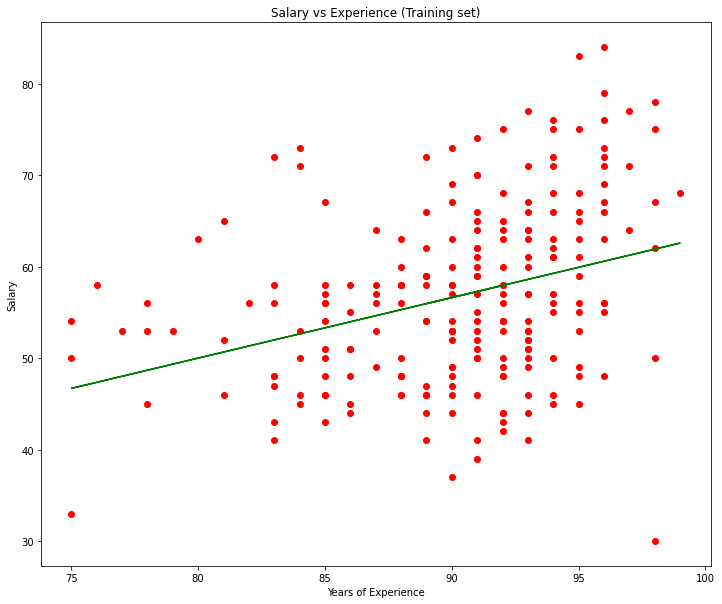

In [17]:
# define model
lassoModel = Lasso(alpha=0.5) #Automate Alpha Set
lassoModel.fit(x_train, y_train)
lassoPredictions = lassoModel.predict(x_test)
Model_score = lassoModel.score(x_test,y_test)
R2_score = r2_score(y_test,lassoPredictions) #Same as Model_Score
Mean_sqrd_err = mean_squared_error(y_test,lassoPredictions)
Root_mn_sqrd_err = np.sqrt(mean_squared_error(y_test,lassoPredictions))
print('Model Score: ', Model_score)
print('R2 Score: ', R2_score)
print('Mean Squared Error: ', Mean_sqrd_err)
print('Root Mean Squared Error: ', Root_mn_sqrd_err)
lassoPredictions = lassoPredictions.reshape(len(lassoPredictions),1)
verification_df = pd.DataFrame(columns=["predicted","lowerlimit", "upperlimit","actual","status"])
for i in range(len(y_test)):
    pred = get_prediction_interval(lassoPredictions[i], y_test, lassoPredictions, pi=.90)
    #pred[0][0] #Returns Lower Limit
    #pred[1][0] #Returns Y_Prediction
    #pred[2][0] #Returns Upper Limit
    #y_test.iloc[i][0] #Returns Y_Actual
    status = 'FAILED'
    if y_test.iloc[i][0] >= pred[0][0] and y_test.iloc[i][0] <= pred[2][0]:
        status = 'PASSED'
    new_row = {'predicted':pred[1][0],'lowerlimit':pred[0][0],'upperlimit':pred[2][0],'actual':y_test.iloc[i][0],'status':status}
    verification_df = verification_df.append(new_row,ignore_index=True)
#verification_df
print('Interval Accuracy Percentage: ',interval_score(verification_df['status'],len(verification_df)))
lower_range = pred[1][0] - pred[0][0]
upper_range = pred[2][0] - pred[1][0]
print('Upper Range: ',upper_range)
print('Lower Range: ',lower_range)

plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lassoModel.predict(x_train), color = "green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [13]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(ridgeModel, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 7.631 (1.035)


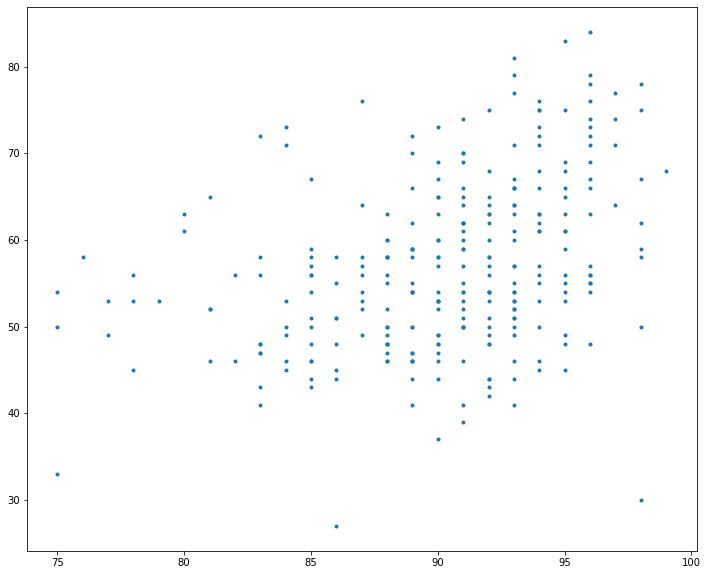

In [14]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
#x = np.array([i*np.pi/180 for i in range(60,300,4)])
#np.random.seed(10)  #Setting seed for reproducibility
#y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
plt.plot(data['x'],data['y'],'.')

In [15]:
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])

    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return R2_score, ret

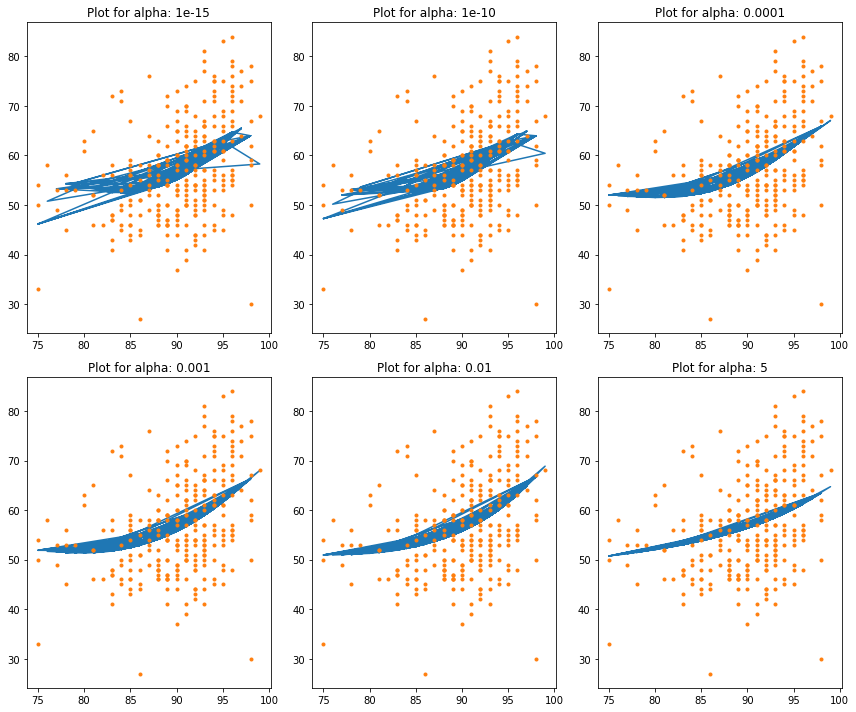

In [16]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    r2score, coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)
    #print(data)